In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Raw Data

In [2]:
df_train = pd.read_csv("./data.csv")
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


# Data Preprocessing
### Getting Data Properties/Information

In [3]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Removing Null/NaN values

In [5]:
df_train.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
df_train.dropna(inplace=True)  #used to remove Null/NaN values from rows and columns

In [7]:
df_train.isnull().sum()

x    0
y    0
dtype: int64

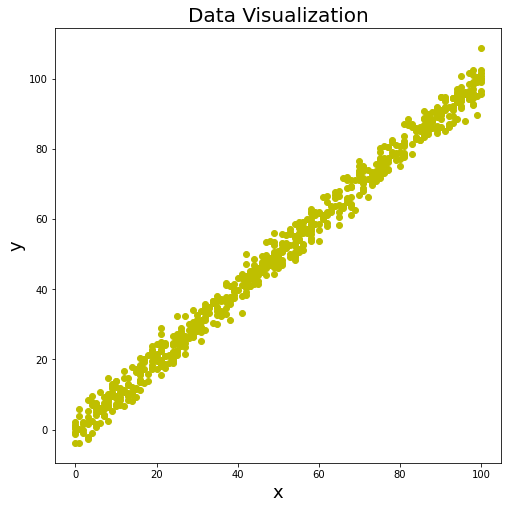

In [8]:
# Visualizing Data
plt.figure(figsize=(8, 8))
plt.plot(df_train['x'], df_train['y'], 'yo');
plt.xlabel('x', size = 18); plt.ylabel('y', size = 18); 
plt.title('Data Visualization', size = 20);

In [9]:
def general_linear_regression(X, y, lr):
    
    if X.shape[0] != y.shape[0]:
        raise ValueError("Length of X and y should be same")
    
    w0 = 1
    w1 = 0
    cost_lst = []
    m = X.shape[0]
    
    while(True):
        y_pred = w0 + w1*X
        cost = (1/(2*m))*(np.sum((y - y_pred)**2))
        cost_lst.append(cost)

        temp0 = w0 - (lr*((-1/m)*np.sum((y - y_pred))))
        temp1 = w1 - (lr*((-1/m)*np.sum((y - y_pred)*X)))

        w0 = temp0
        w1 = temp1

        y_pred_next = w0 + w1*X
        cost_next = (1/(2*m))*(np.sum((y - y_pred_next)**2))
        
        if round(cost, 7) == round(cost_next, 7):
            return w0, w1, cost, cost_lst
    
    
intercept, coef, cost, cost_lst = general_linear_regression(df_train.x, df_train.y, 1e-6)
print(intercept, coef, cost)

1.013886642010726 0.9838207856524955 4.091475845985218


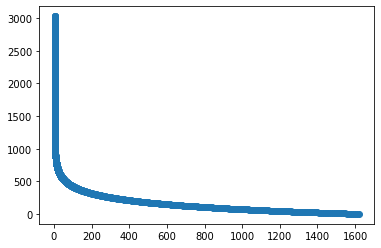

In [10]:
plt.scatter(cost_lst, range(len(cost_lst)))

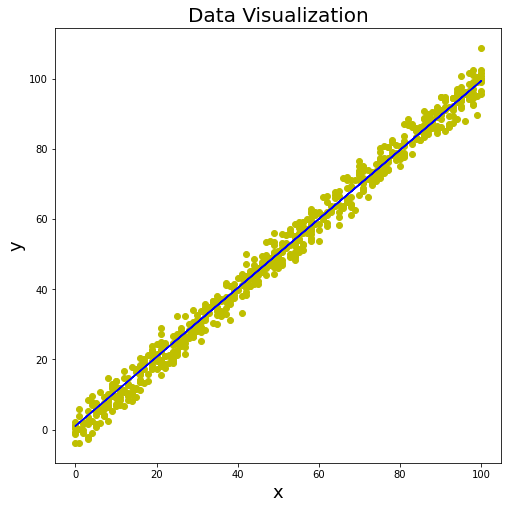

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(df_train['x'], df_train['y'], 'yo');
plt.plot(df_train.x, intercept + coef*(df_train.x), color='blue')
plt.xlabel('x', size = 18); plt.ylabel('y', size = 18); 
plt.title('Data Visualization', size = 20);

In [12]:
#initial variance present in data
SST = np.sum((df_train.y - df_train.mean()['y'])**2)

y_pred = intercept + coef*(df_train.x)

#sum of square error
SSE = np.sum((df_train.y - y_pred)**2)

#amount of variance captured by model
SSR = np.sum((y_pred - df_train.mean()['y'])**2)

print(SST)
print(SSE)
print(SSR)

591447.8710979458
5719.883098676209
566451.999165653


In [13]:
# R-square: variance captured by model over variance present in data

R2 = SSR/SST
print(R2)

0.9577378275351787


In [14]:
#ideally SST = SSE + SSR
print(SST, SSE + SSR)

591447.8710979458 572171.8822643292


In [15]:
R2 = 1 - SSE/SST
print(R2)

0.9903290156610793
